# Data Storytelling

## Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in intermediate CSV

In [2]:
all_patents_df = pd.read_csv('../intermediate_csv_files/clean_raw_data.csv', parse_dates=['filing_date','grant_date'])

In [3]:
all_patents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352567 entries, 0 to 352566
Data columns (total 10 columns):
Unnamed: 0                  352567 non-null int64
application_number          352567 non-null int64
application_type            352567 non-null object
filing_date                 352567 non-null datetime64[ns]
grant_date                  352567 non-null datetime64[ns]
invention_title             352567 non-null object
number-of-drawing-sheets    352567 non-null int64
number-of-figures           352567 non-null int64
number_of_claims            352567 non-null int64
patent_number               352567 non-null object
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 26.9+ MB


## Data Type Casting

In [4]:
all_patents_df[['number-of-drawing_sheets','number-of-figures','number_of_claims']] = all_patents_df[['number-of-drawing-sheets','number-of-figures','number_of_claims']].astype(int) 

In [5]:
all_patents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352567 entries, 0 to 352566
Data columns (total 11 columns):
Unnamed: 0                  352567 non-null int64
application_number          352567 non-null int64
application_type            352567 non-null object
filing_date                 352567 non-null datetime64[ns]
grant_date                  352567 non-null datetime64[ns]
invention_title             352567 non-null object
number-of-drawing-sheets    352567 non-null int64
number-of-figures           352567 non-null int64
number_of_claims            352567 non-null int64
patent_number               352567 non-null object
number-of-drawing_sheets    352567 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 29.6+ MB


In [6]:
all_patents_df.number_of_claims.describe()

count    352567.000000
mean         14.817195
std           9.122482
min           1.000000
25%           9.000000
50%          16.000000
75%          20.000000
max         381.000000
Name: number_of_claims, dtype: float64

In [7]:
utility_patents_df = all_patents_df[all_patents_df.application_type == 'utility']

utility_patents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319983 entries, 649 to 352566
Data columns (total 11 columns):
Unnamed: 0                  319983 non-null int64
application_number          319983 non-null int64
application_type            319983 non-null object
filing_date                 319983 non-null datetime64[ns]
grant_date                  319983 non-null datetime64[ns]
invention_title             319983 non-null object
number-of-drawing-sheets    319983 non-null int64
number-of-figures           319983 non-null int64
number_of_claims            319983 non-null int64
patent_number               319983 non-null object
number-of-drawing_sheets    319983 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 29.3+ MB


In [8]:
utility_patents_df.number_of_claims.describe()

count    319983.000000
mean         16.199423
std           8.377739
min           1.000000
25%          11.000000
50%          17.000000
75%          20.000000
max         381.000000
Name: number_of_claims, dtype: float64

## Dealing with Number of Claims Outliers

From the summary statistics on number of claims across the entire set, we see that the median number of claims is 17, while the maximum is 381.  This indicates that the distribution will be skewed to the right.  When reviewing the data, this observation can be seen by looking at the `.value_counts()` for each distinct value in the `number_of_claims` column. From industry experience, one would understand that most utility patent applications have less than 50 claims.  So, in order to create a better distribution, we will narrow down this data set by removing those patents with a number of claims that is greater than 3 standard deviations from the median value.

In [9]:
claims_std_dev = utility_patents_df.number_of_claims.std()
claims_median = utility_patents_df.number_of_claims.median()

In [10]:
utility_patents_subset_df = utility_patents_df[utility_patents_df.number_of_claims <= (claims_median + 3*claims_std_dev)].copy()

In [11]:
utility_patents_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316685 entries, 649 to 352566
Data columns (total 11 columns):
Unnamed: 0                  316685 non-null int64
application_number          316685 non-null int64
application_type            316685 non-null object
filing_date                 316685 non-null datetime64[ns]
grant_date                  316685 non-null datetime64[ns]
invention_title             316685 non-null object
number-of-drawing-sheets    316685 non-null int64
number-of-figures           316685 non-null int64
number_of_claims            316685 non-null int64
patent_number               316685 non-null object
number-of-drawing_sheets    316685 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 29.0+ MB


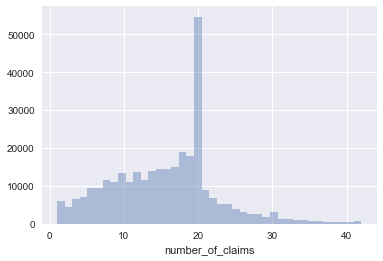

In [34]:
sns.set(color_codes=True)

sns.distplot(utility_patents_subset_df.number_of_claims, bins=40, kde=False)

plt.show()

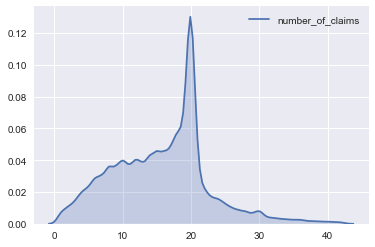

In [13]:
sns.kdeplot(utility_patents_subset_df.number_of_claims, shade=True)

plt.show()

# Calculating Prosecution Period

The time period during which a patent application is being "prosecuted" begins with the filing date and ends with the grant date.

In [24]:
# create new column 'prosecution_period' as difference between grant date and filing date

utility_patents_subset_df['prosecution_period'] = utility_patents_subset_df.grant_date - utility_patents_subset_df.filing_date

In [25]:
utility_patents_subset_df.head()

,Unnamed: 0,application_number,application_type,filing_date,grant_date,invention_title,number-of-drawing-sheets,number-of-figures,number_of_claims,patent_number,number-of-drawing_sheets,prosecution_period
649,649,14840940,utility,2015-08-31,2017-10-31,Vertical tillage scraper,8,8,10,09801321,8,792 days
650,650,15033989,utility,2014-11-08,2017-10-31,"Implement weight management systems, methods, ...",13,16,19,09801322,13,1088 days
651,651,14537206,utility,2014-11-10,2017-10-31,Rocker link lift system,4,4,12,09801323,4,1086 days
652,652,14619305,utility,2015-02-11,2017-10-31,Bi-fold tool bar linkage,4,10,17,09801324,4,993 days
653,653,14411774,utility,2013-06-27,2017-10-31,Hub cover for agriculture purposes,6,6,9,09801325,6,1587 days


In [26]:
utility_patents_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316685 entries, 649 to 352566
Data columns (total 12 columns):
Unnamed: 0                  316685 non-null int64
application_number          316685 non-null int64
application_type            316685 non-null object
filing_date                 316685 non-null datetime64[ns]
grant_date                  316685 non-null datetime64[ns]
invention_title             316685 non-null object
number-of-drawing-sheets    316685 non-null int64
number-of-figures           316685 non-null int64
number_of_claims            316685 non-null int64
patent_number               316685 non-null object
number-of-drawing_sheets    316685 non-null int64
prosecution_period          316685 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(6), object(3), timedelta64[ns](1)
memory usage: 41.4+ MB


In [29]:
utility_patents_subset_df.prosecution_period = utility_patents_subset_df.prosecution_period.apply(lambda x: x.days)

In [30]:
utility_patents_subset_df.prosecution_period.describe()

count    316685.000000
mean       1063.678700
std         620.980377
min          60.000000
25%         627.000000
50%         950.000000
75%        1355.000000
max       11493.000000
Name: prosecution_period, dtype: float64

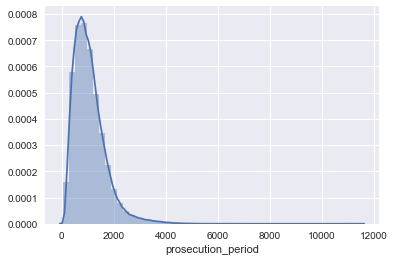

In [35]:
sns.distplot(utility_patents_subset_df.prosecution_period)

plt.show()

## Dealing with Prosecution Period Outliers

Based on the above histogram with KDE plot, we can see that the prosecution period is skewed by a long tail on the right side.  Similar to the narrowing of the data set that we performed for the `number_of_claims` column, we will filter out all of the values that are greater than 3 standard deviations from the median value.

In [36]:
pros_std_dev = utility_patents_subset_df.prosecution_period.std()
pros_median = utility_patents_subset_df.prosecution_period.median()

utility_patents_subset_df = utility_patents_subset_df[utility_patents_subset_df.prosecution_period <= (pros_median + 3*pros_std_dev)]

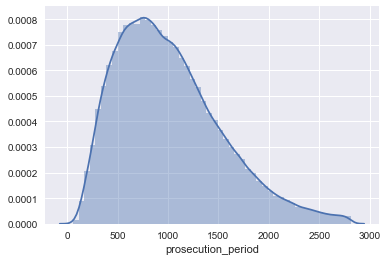

In [37]:
sns.distplot(utility_patents_subset_df.prosecution_period)

plt.show()

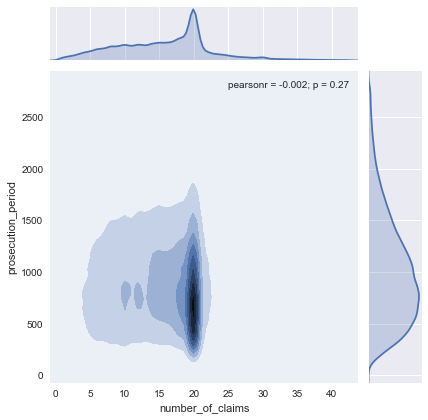

In [40]:
sns.jointplot(x='number_of_claims', y='prosecution_period', data=utility_patents_subset_df, kind="kde")
plt.show()

In [41]:
sns.distplot(utility_patents_subset_df.grant_date)
plt.show()

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')